In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [7]:
!pip install kaggle

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sayantikalaskar","key":"9c46cbc3dc0f3d53e9eef348359a288e"}'}

In [9]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d rohanrao/nifty50-stock-market-data

Dataset URL: https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data
License(s): CC0-1.0
 92% 17.0M/18.4M [00:01<00:00, 27.8MB/s]
100% 18.4M/18.4M [00:01<00:00, 18.6MB/s]


In [11]:
!unzip nifty50-stock-market-data.zip

Archive:  nifty50-stock-market-data.zip
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINT.csv          
  inflating: AXISBANK.csv            
  inflating: BAJAJ-AUTO.csv          
  inflating: BAJAJFINSV.csv          
  inflating: BAJFINANCE.csv          
  inflating: BHARTIARTL.csv          
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DRREDDY.csv             
  inflating: EICHERMOT.csv           
  inflating: GAIL.csv                
  inflating: GRASIM.csv              
  inflating: HCLTECH.csv             
  inflating: HDFC.csv                
  inflating: HDFCBANK.csv            
  inflating: HEROMOTOCO.csv          
  inflating: HINDALCO.csv            
  inflating: HINDUNILVR.csv          
  inflating: ICICIBANK.csv           
  inflating: INDUSINDBK.csv          
  inflating: INFRATEL.csv            
  inflating: INFY.csv                
  inflatin

In [127]:
df = pd.read_csv('NIFTY50_all.csv')

In [128]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [129]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
235187,2021-04-26,ZEEL,EQ,188.00,190.6,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.0,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.8,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.8,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894
235191,2021-04-30,ZEEL,EQ,186.55,185.3,190.95,183.65,185.00,185.60,187.53,11435285,2.144440e+14,62607.0,3323909.0,0.2907


In [130]:
# Viewing the basic statistics
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


In [131]:
df.shape

(235192, 15)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [133]:
dfr = df[['Close','Open','High','Low','Last','Prev Close']]

In [134]:
dfr.describe()

,Close,Open,High,Low,Last,Prev Close
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000
mean,1266.554351,1267.759708,1286.581440,1247.488465,1266.388302,1266.196349
std,2582.140942,2585.259609,2619.649216,2546.621396,2581.392543,2581.370320
min,9.150000,8.500000,9.750000,8.500000,9.100000,0.000000
25%,274.350000,275.000000,279.500000,269.600000,274.400000,274.300000
50%,566.700000,567.025000,576.900000,556.500000,567.000000,566.500000
75%,1242.400000,1243.312500,1263.000000,1221.650000,1242.900000,1242.200000
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000


In [135]:
cor_matrix = dfr.corr()
cor_matrix

,Close,Open,High,Low,Last,Prev Close
Close,1.000000,0.999761,0.999892,0.999878,0.999991,0.999518
Open,0.999761,1.000000,0.999857,0.999863,0.999748,0.999718
High,0.999892,0.999857,1.000000,0.999790,0.999881,0.999616
Low,0.999878,0.999863,0.999790,1.000000,0.999868,0.999601
Last,0.999991,0.999748,0.999881,0.999868,1.000000,0.999505
Prev Close,0.999518,0.999718,0.999616,0.999601,0.999505,1.000000


Text(0.5, 1.0, 'Correlation of Variables ')

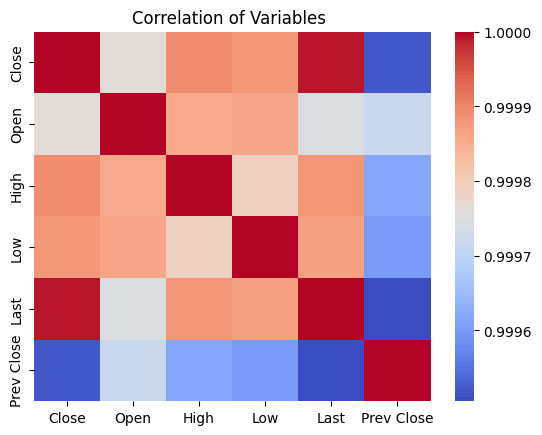

In [136]:
sns.heatmap(cor_matrix , cmap = 'coolwarm' , annot = False)
plt.title('Correlation of Variables ')

Text(0.5, 1.0, 'Relationship of Closing and Opening price')

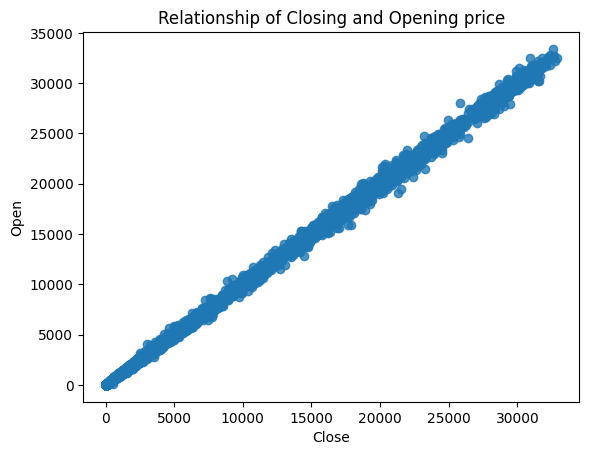

In [137]:
sns.regplot(x = df[['Close']], y = df[['Open']], data= df)
plt.title("Relationship of Closing and Opening price")

Text(0.5, 1.0, 'Relationship of Closing and High price')

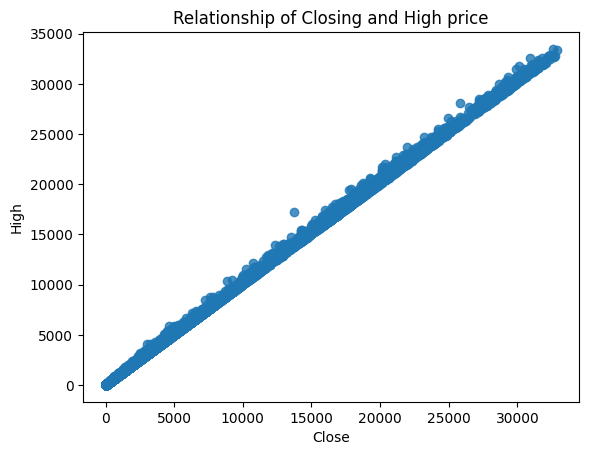

In [138]:
sns.regplot(x = df[['Close']], y = df[['High']], data= df)
plt.title("Relationship of Closing and High price")

Text(0.5, 1.0, 'Relationship of Closing and Low price')

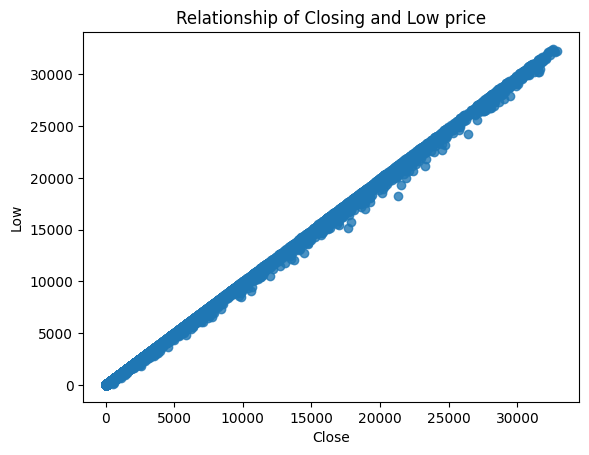

In [139]:
sns.regplot(x = df[['Close']], y = df[['Low']], data= df)
plt.title("Relationship of Closing and Low price")

Text(0.5, 1.0, 'Relationship of Closing and Last price')

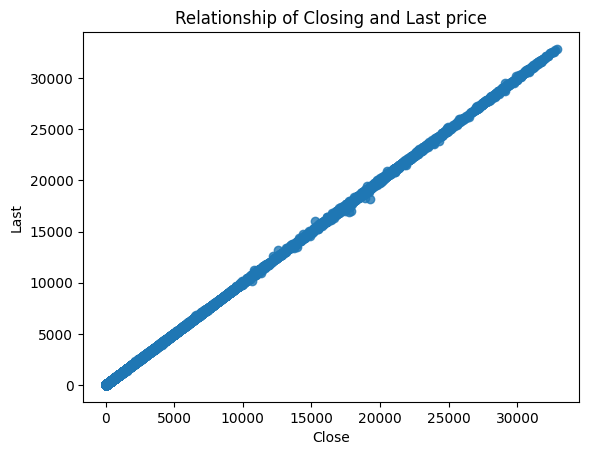

In [140]:
sns.regplot(x = df[['Close']], y = df[['Last']], data= df)
plt.title("Relationship of Closing and Last price")

Text(0.5, 1.0, 'Relationship of Closing and Previouse close price')

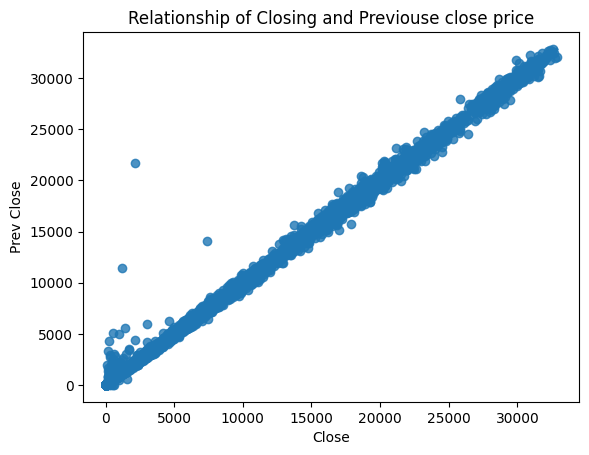

In [141]:
sns.regplot(x = df[['Close']], y = df[['Prev Close']], data= df)
plt.title("Relationship of Closing and Previouse close price")

In [142]:
y = df[['Close']]
x = df[['Open','High','Low','Last','Prev Close']]

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state  = 0)

In [144]:
#dimentions of training models
x_train.shape

(164634, 5)

In [145]:
#dimentions of testing models
x_test.shape

(70558, 5)

In [146]:
lm = LinearRegression()
lm.fit(x_train,y_train)

print('Intercept: ' ,  lm.intercept_)
print('coefficient : ' ,  lm.coef_)

Intercept:  [-0.20497005]
coefficient :  [[-0.08503742  0.13760273  0.13937188  0.81194957 -0.00361854]]


In [147]:
#Predicting the model
yhat = lm.predict(x_test)

print(yhat)

[[ 876.10172627]
 [ 288.40765927]
 [ 578.9877583 ]
 ...
 [2079.40933303]
 [ 767.59635619]
 [ 795.20626579]]


In [148]:
print({'Actual': y_test, 'Predicted': yhat})

{'Actual':           Close
23327    875.25
161008   289.30
76045    579.45
105660   218.60
19955   8265.95
...         ...
174487  1937.55
183400   787.15
57313   2068.55
143685   770.45
7244     794.10

[70558 rows x 1 columns], 'Predicted': array([[ 876.10172627],
       [ 288.40765927],
       [ 578.9877583 ],
       ...,
       [2079.40933303],
       [ 767.59635619],
       [ 795.20626579]])}


<Axes: ylabel='Density'>

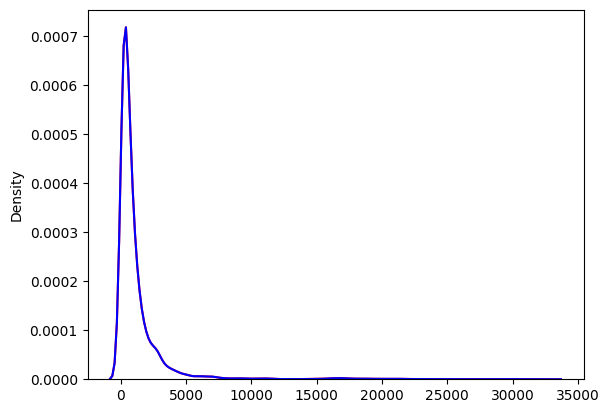

In [149]:
axl = sns.distplot(y_test, hist = False , color  = 'r')

sns.distplot(yhat, hist = False , color = 'b', ax = axl)

In [150]:
mean_squared_error(y_test, yhat )

100.72942135665254

In [151]:
rsqr = lm.score(x,y)

print('R - Squared :' , rsqr)

R - Squared : 0.9999854376477174


Text(0.5, 0, 'yhat')

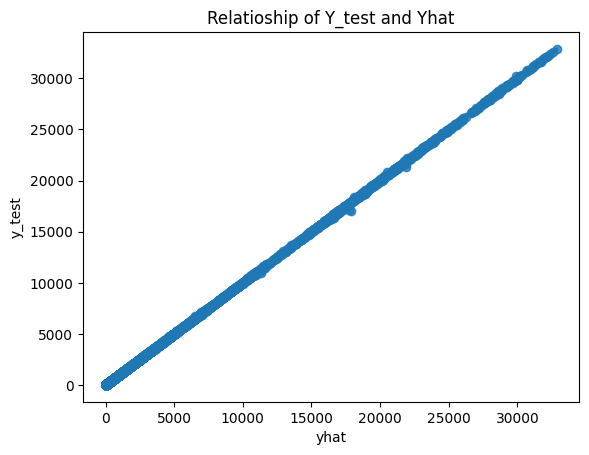

In [152]:
sns.regplot( x = y_test, y = yhat , data = df)
plt.title('Relatioship of Y_test and Yhat')
plt.ylabel('y_test')
plt.xlabel('yhat')

In [153]:
values = [[3326,3335,3302,3308,3324]]

closep = lm.predict(values)

print('Closing Price :', closep)

Closing Price : [[3309.97279386]]
